In [ ]:
try:
  import yahoo_fin.stock_info as si
except ModuleNotFoundError:
  if 'google.colab' in str(get_ipython()):
    %pip install yahoo_fin

  import yahoo_fin.stock_info as si

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.7 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=0610c5c712fb8c2fdc92843b559670f731f6b9e692365a5eaf929e53b33506f7
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6046 sha256=efe3e054d0f53c30babd9ae43a39bffa019aacbce5d918f814d5ef2223b58cf1
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built bs4 sgmllib3k


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras. utils.vis_utils import plot_model
import random
plt.style.use('seaborn-v0_8-bright')

In [ ]:
np.random.seed(314)
tf.random.set_seed(314)
random.seed(314)

In [ ]:
ticker = "nvda"
df = si.get_data(ticker)
# collects data for specified ticker

In [ ]:
df.head()

,open,high,low,close,adjclose,volume,ticker
1999-01-22,0.437500,0.488281,0.388021,0.410156,0.376319,271468800,NVDA
1999-01-25,0.442708,0.458333,0.410156,0.453125,0.415743,51048000,NVDA
1999-01-26,0.458333,0.467448,0.411458,0.417969,0.383487,34320000,NVDA
1999-01-27,0.419271,0.429688,0.395833,0.416667,0.382293,24436800,NVDA
1999-01-28,0.416667,0.419271,0.412760,0.415365,0.381098,22752000,NVDA


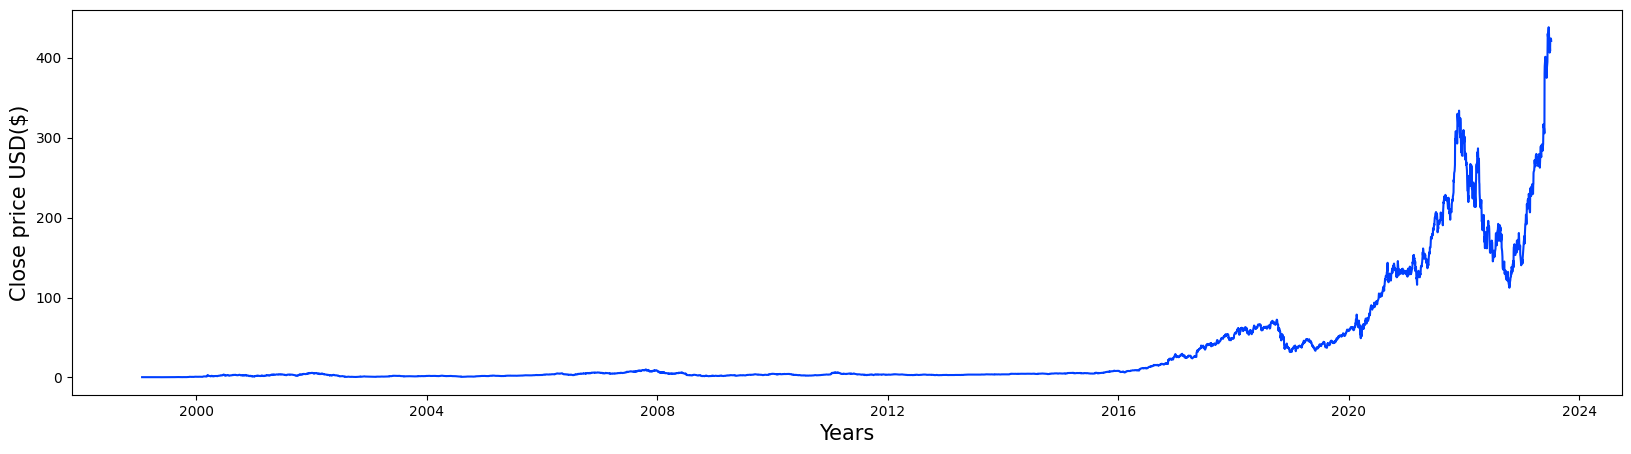

In [ ]:
plt.figure(figsize=(20,5))
plt.xlabel('Years',fontsize=15)
plt.ylabel('Close price USD($)',fontsize=15)
plt.plot(df['close'])

<Axes: >

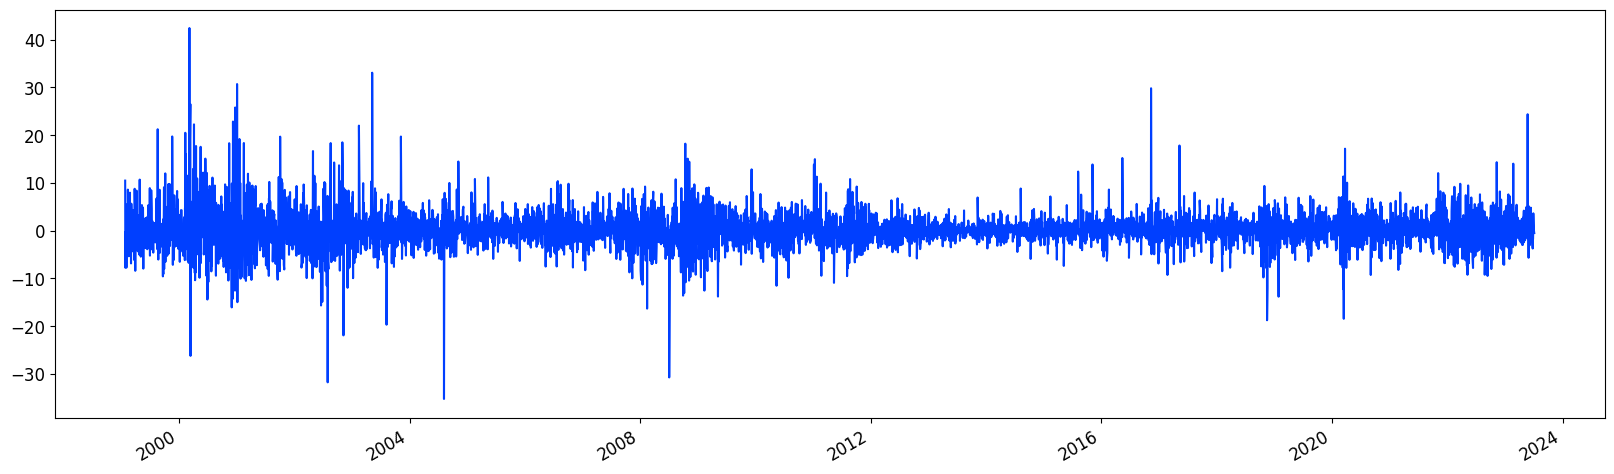

In [ ]:
# day to day % change

df['Day_Perc_Change'] = df['close'].pct_change()*100
df.dropna(axis = 0, inplace = True)
# df.head()
df['Day_Perc_Change'].plot(figsize = (20, 6), fontsize = 12)

In [ ]:
# Trend Analysis

def trend(x):
  if x > -0.5 and x <= 0.5:
    return 'Slight or No change'
  elif x > 0.5 and x <= 1:
    return '‘Slight Positive’'
  elif x > -1 and x <= -0.5:
    return '‘Slight Negative’'
  elif x > 1 and x <= 3:
    return '‘Positive’'
  elif x > -3 and x <= -1:
    return '‘Negative’'
  elif x > 3 and x <= 7:
    return '‘Among top gainers’'
  elif x > -7 and x <= -3:
    return '‘Among top losers’'
  elif x > 7:
    return '‘Bull run’'
  elif x <= -7:
    return '‘Bear drop’'
df['Trend']= np.zeros(df['Day_Perc_Change'].count())
df['Trend']= df['Day_Perc_Change'].apply(lambda x:trend(x))
df.head()

,open,high,low,close,adjclose,volume,ticker,Day_Perc_Change,Trend
1999-01-25,0.442708,0.458333,0.410156,0.453125,0.415743,51048000,NVDA,10.476255,‘Bull run’
1999-01-26,0.458333,0.467448,0.411458,0.417969,0.383487,34320000,NVDA,-7.758568,‘Bear drop’
1999-01-27,0.419271,0.429688,0.395833,0.416667,0.382293,24436800,NVDA,-0.311500,Slight or No change
1999-01-28,0.416667,0.419271,0.412760,0.415365,0.381098,22752000,NVDA,-0.312481,Slight or No change
1999-01-29,0.415365,0.416667,0.395833,0.395833,0.363177,24403200,NVDA,-4.702376,‘Among top losers’


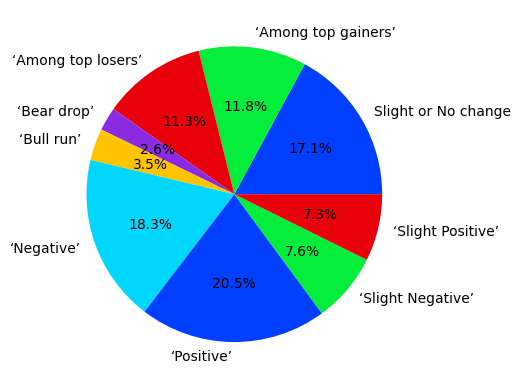

In [ ]:
# Trend frequency
pie_data = df.groupby('Trend')
pie_label = sorted([i for i in df.loc[:, 'Trend'].unique()])
plt.pie(pie_data['Trend'].count(), labels = pie_label,
        autopct = '%1.1f%%', radius = 1)

plt.show()

In [ ]:
df.tail(7)

,open,high,low,close,adjclose,volume,ticker,Day_Perc_Change,Trend
2023-06-27,407.989990,419.399994,404.480011,418.760010,418.760010,46217500,NVDA,3.061627,‘Among top gainers’
2023-06-28,406.600006,418.450012,405.179993,411.170013,411.170013,58263900,NVDA,-1.812493,‘Negative’
2023-06-29,415.579987,416.000000,406.000000,408.220001,408.220001,38051400,NVDA,-0.717468,‘Slight Negative’
2023-06-30,416.799988,425.500000,415.010010,423.019989,423.019989,50053400,NVDA,3.625493,‘Among top gainers’
2023-07-03,425.170013,428.980011,422.019989,424.130005,424.130005,19820900,NVDA,0.262403,Slight or No change
2023-07-05,421.350006,431.769989,420.850006,423.170013,423.170013,32361800,NVDA,-0.226344,Slight or No change
2023-07-06,418.440002,421.790009,413.459991,421.029999,421.029999,30358200,NVDA,-0.505710,‘Slight Negative’


In [ ]:
df.shape

(6152, 9)

In [ ]:
data = df.reset_index(drop=True)


In [ ]:
df.tail()

,open,high,low,close,adjclose,volume,ticker,Day_Perc_Change,Trend
2023-06-29,415.579987,416.000000,406.000000,408.220001,408.220001,38051400,NVDA,-0.717468,‘Slight Negative’
2023-06-30,416.799988,425.500000,415.010010,423.019989,423.019989,50053400,NVDA,3.625493,‘Among top gainers’
2023-07-03,425.170013,428.980011,422.019989,424.130005,424.130005,19820900,NVDA,0.262403,Slight or No change
2023-07-05,421.350006,431.769989,420.850006,423.170013,423.170013,32361800,NVDA,-0.226344,Slight or No change
2023-07-06,418.440002,421.790009,413.459991,421.029999,421.029999,30358200,NVDA,-0.505710,‘Slight Negative’


In [ ]:
data.tail()

,open,high,low,close,adjclose,volume,ticker,Day_Perc_Change,Trend
6147,415.579987,416.000000,406.000000,408.220001,408.220001,38051400,NVDA,-0.717468,‘Slight Negative’
6148,416.799988,425.500000,415.010010,423.019989,423.019989,50053400,NVDA,3.625493,‘Among top gainers’
6149,425.170013,428.980011,422.019989,424.130005,424.130005,19820900,NVDA,0.262403,Slight or No change
6150,421.350006,431.769989,420.850006,423.170013,423.170013,32361800,NVDA,-0.226344,Slight or No change
6151,418.440002,421.790009,413.459991,421.029999,421.029999,30358200,NVDA,-0.505710,‘Slight Negative’


In [ ]:
data.describe()

,open,high,low,close,adjclose,volume,Day_Perc_Change
count,6152.000000,6152.000000,6152.000000,6152.000000,6152.000000,6.152000e+03,6152.000000
mean,33.928827,34.578766,33.269390,33.953893,33.692322,6.121736e+07,0.185154
std,67.061621,68.401339,65.712775,67.117512,67.123629,4.385773e+07,3.819483
min,0.348958,0.355469,0.333333,0.341146,0.313002,1.968000e+06,-35.233527
25%,2.681459,2.767500,2.612500,2.684974,2.463467,3.442440e+07,-1.631018
50%,4.366250,4.440000,4.279584,4.365000,4.022098,5.136780e+07,0.105563
75%,33.111875,34.220001,32.365001,33.300001,33.046971,7.450550e+07,1.805002
max,435.010010,439.899994,426.739990,438.079987,438.079987,9.230856e+08,42.414523


In [ ]:
si.get_live_price(ticker)

421.0299987792969

In [ ]:
# create df with only close values
df = data.filter(['close'])
df.head()

,close
0,0.453125
1,0.417969
2,0.416667
3,0.415365
4,0.395833


In [ ]:
# convert df into numpy array
dataset = df.values
dataset

array([[4.53125000e-01],
       [4.17968988e-01],
       [4.16667014e-01],
       ...,
       [4.24130005e+02],
       [4.23170013e+02],
       [4.21029999e+02]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
scaled_data = sc.fit_transform(dataset)
print(scaled_data.shape)
scaled_data[:5]
# print(len(scaled_data))

(6152, 1)


array([[0.00025581],
       [0.0001755 ],
       [0.00017253],
       [0.00016955],
       [0.00012493]])

In [ ]:
# inv_sc_data = sc.inverse_transform(scaled_data)
# inv_sc_data
# # returns scaled_data values back (works :) as expected!)

In [ ]:
train_data_len = int(len(scaled_data)*0.8)
print(train_data_len)
# test_data_len = len(scaled_data) - train_data_len    # - only for reference (won't be used)
# print(test_data_len)

4921


In [ ]:
n = 2   # as later our timestep will be n
train_data = scaled_data[:train_data_len,:]
test_data = scaled_data[train_data_len-n:,:]
print(train_data.shape)
print(test_data.shape)
print(train_data[0],train_data[-1])  # first and last element of training data
print(scaled_data[train_data_len-1],"\n")
print(scaled_data[train_data_len])
print(test_data[0],test_data[-1])  # first and last element of testing data

(4921, 1)
(1233, 1)
[0.00025581] [0.14549509]
[0.14549509] 

[0.14852772]
[0.14473551] [0.96104986]


In [ ]:
X_train = []
y_train = []
for i in range(n,train_data_len):
  # below [,0]  signifies that only first coln is taken as a feature
  X_train.append(train_data[i-n:i,0])
  y_train.append(train_data[i,0])
  if(i<=n+1): # prints training and testing data for first 2 iterations
    print(X_train)
    print(y_train)

print()
print(len(X_train))
print(len(y_train))
print(type(X_train))
print(type(y_train))

[array([0.00025581, 0.0001755 ])]
[0.0001725252938060346]
[array([0.00025581, 0.0001755 ]), array([0.0001755 , 0.00017253])]
[0.0001725252938060346, 0.000169550908762321]

4919
4919
<class 'list'>
<class 'list'>


In [ ]:
X_test = []
y_test = dataset[train_data_len:]
for i in range(n,len(test_data)):
  X_test.append(test_data[i-n:i,0])


In [ ]:
# print(X_test[-5:])

In [ ]:
# print(scaled_data[-5:])

In [ ]:
# print(len(test_data))
print(len(X_test))
print(len(y_test))
print(type(X_test))
print(type(y_test))

1231
1231
<class 'list'>
<class 'numpy.ndarray'>


In [ ]:
X_train,y_train,X_test,y_test = np.array(X_train),np.array(y_train),np.array(X_test),np.array(y_test)
print(type(X_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# (no. of samples, no. of timesteps)  ---> X_train
print(X_train.shape)
print(y_train.shape)

(4919, 2)
(4919,)


In [ ]:
# Reshape the data
# Lstm needs 3-D data - (no. of samples, no. of timesteps, no. of features)


In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(1231, 2, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Bidirectional

In [ ]:
# Build Lstm model
model = Sequential()
#   X_train[1].shape   below signifies no. of timesteps
# X_train.shape[1],1 ---> shape of each sample input
model.add( Bidirectional(LSTM(200, input_shape=(X_train.shape[1],1), return_sequences=True )) )
model.add( Bidirectional(LSTM(200, return_sequences=False )) )  # no need to give input shape (only given to first layer)
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# Compile model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
# Train model
model.fit(X_train,y_train,batch_size=128,epochs=5)

Epoch 1/5
39/39 [==============================] - 12s 79ms/step - loss: 2.1704e-04
Epoch 2/5
39/39 [==============================] - 3s 85ms/step - loss: 4.4268e-06
Epoch 3/5
39/39 [==============================] - 3s 76ms/step - loss: 1.0503e-06
Epoch 4/5
39/39 [==============================] - 3s 72ms/step - loss: 9.8733e-07
Epoch 5/5
39/39 [==============================] - 3s 78ms/step - loss: 8.6518e-07


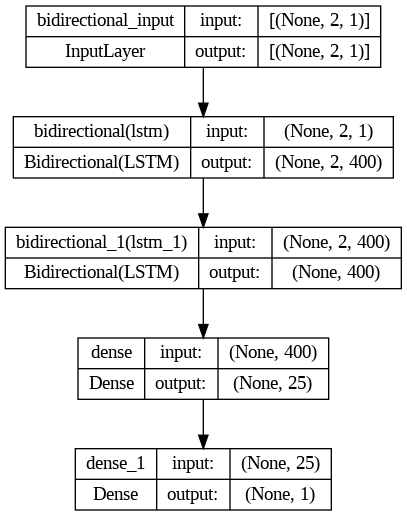

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
y_pred = model.predict(X_test)
y_pred = sc.inverse_transform(y_pred)

39/39 [==============================] - 2s 8ms/step


In [ ]:
summ = 0
for i in range(X_test.shape[0]):
  summ+=abs( y_test[i] - y_pred[i] )

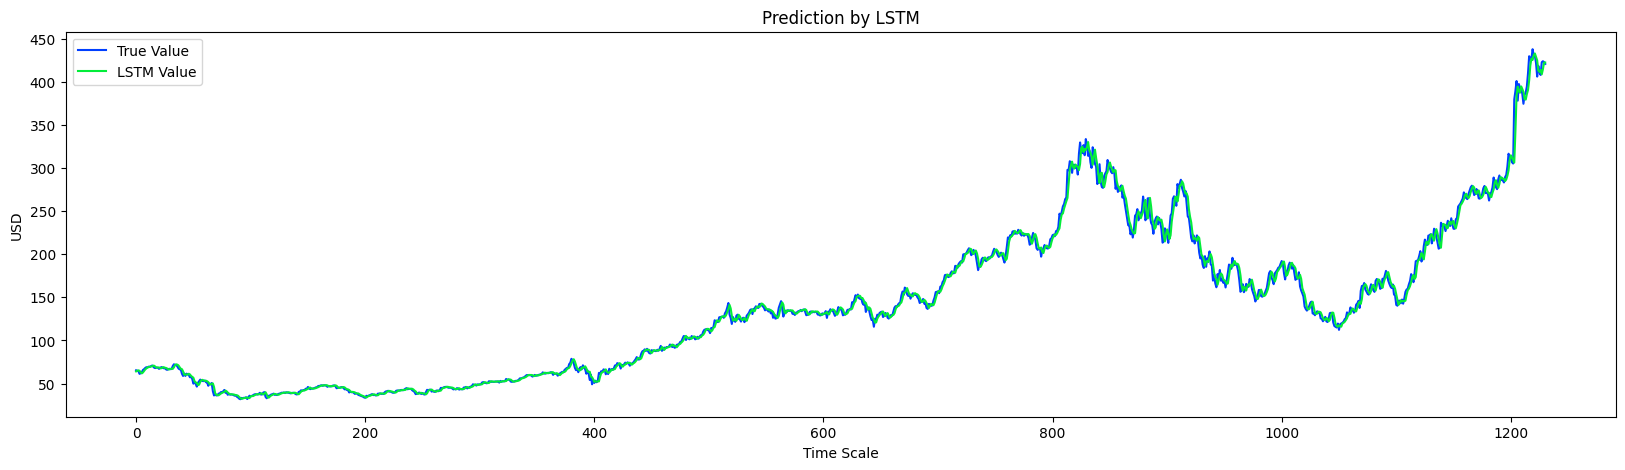

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(y_test)
plt.plot(y_pred)
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('USD')
plt.legend(['True Value','LSTM Value'],loc='upper left')
plt.show()

In [ ]:
si.get_live_price(ticker)

421.0299987792969

In [ ]:
y_pred[-10:]

array([[433.11044],
       [429.2662 ],
       [425.14853],
       [413.36334],
       [411.7433 ],
       [414.1185 ],
       [408.92996],
       [414.7785 ],
       [422.6018 ],
       [422.67413]], dtype=float32)

In [ ]:
y_test[-10:]

array([[430.25      ],
       [422.08999634],
       [406.32000732],
       [418.76000977],
       [411.17001343],
       [408.22000122],
       [423.01998901],
       [424.13000488],
       [423.17001343],
       [421.02999878]])

In [ ]:
err_count = 0
for i in range(len(y_pred)):
  err = abs(y_pred[i]-y_test[i])
  if (err>=2):
    err_count +=1
print(err_count)
print(len(y_pred))

661
1231


In [ ]:
# XTEST,YTEST = list(X_test),list(y_test)
# print(X_test.shape)

In [ ]:
# loss,mae = model.evaluate(X_test, y_test, verbose=0)
# # mae = sc.inverse_transform(mae)
# loss,mae

In [ ]:
print(summ/X_test.shape[0])

[3.9689416]


In [ ]:

rmse = np.sqrt(np.mean((y_pred-y_test)**2))
rmse

6.379988272206531

<ipython-input-49-d03e0d610531>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predicted']=y_pred


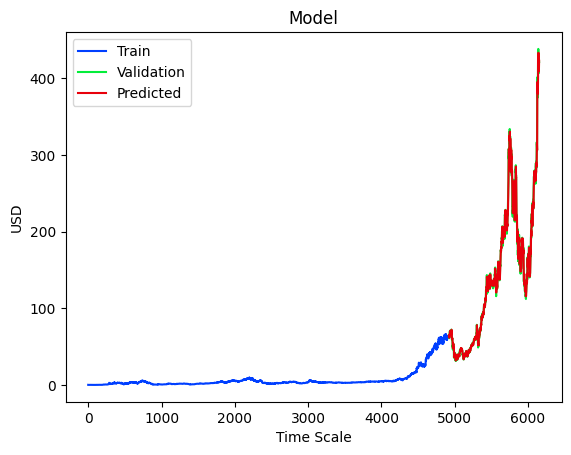

In [ ]:
train = df[:train_data_len]
validation = df[train_data_len:]
validation['Predicted']=y_pred

# plt.figure(figsize=(16,5))
plt.plot(train['close'])
plt.plot(validation[['close','Predicted']])
plt.title("Model")
plt.xlabel('Time Scale')
plt.ylabel('USD')
plt.legend(['Train','Validation','Predicted'],loc='upper left')
plt.style.use('seaborn-v0_8-bright')
plt.show()

In [ ]:
validation = validation[['close','Predicted']]
validation[-10:]

,close,Predicted
6142,430.250000,433.110443
6143,422.089996,429.266205
6144,406.320007,425.148529
6145,418.760010,413.363342
6146,411.170013,411.743286
6147,408.220001,414.118500
6148,423.019989,408.929962
6149,424.130005,414.778503
6150,423.170013,422.601807
6151,421.029999,422.674133


In [ ]:
quote = si.get_data(ticker,start_date="2023-06-12")

new_df = quote.filter(['close'])
vals = new_df[-n:].values
vals_scaled = sc.transform(vals)
test = []
test.append(vals_scaled)
test = np.array(test)
test = np.reshape(test,(test.shape[0],test.shape[1],1))
# test.shape
predicted_price = model.predict(test)
predicted_price = sc.inverse_transform(predicted_price)
print("current live price",si.get_live_price(ticker))
print("Predicted price tmrw",float(predicted_price))

1/1 [==============================] - 0s 19ms/step
current live price 421.0299987792969
Predicted price tmrw 421.1478271484375


In [ ]:
quote2 = si.get_data(ticker,start_date="2023-06-12")
latest = quote2.filter(['close'])
latest = latest[-1:]
latest

,close
2023-07-06,421.029999


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 2, 400)           323200    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 400)              961600    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 25)                10025     
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 1,294,851
Trainable params: 1,294,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# for i in range(5):
#   print(i)